Firstly, we import all the essential libraries!

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import PIL
from PIL import Image
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

From Ultralytics module we import the **'yolov8n-pose.pt'** which is a pretrained model, especially good in human detection and pose estimation.

In [4]:
model=YOLO('yolov8n-pose.pt')

**Make sure to load the annotations.json file into your Google Colab/Jupyter Notebook.**

In [5]:
# Specify the file name (if uploaded) or the local file path
file_name = 'human_annotations.json'

# Open and read the JSON file
with open(file_name, 'r') as f:
    json_data = json.load(f)

In [6]:
print(json_data)

{'02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG': [{'file': '02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG', 'box': [323, 151, 620, 899], 'landmarks': [{'id': 0, 'x': 0.4346538484096527, 'y': 0.22773808240890503, 'z': -1.628859281539917, 'visibility': 0.9999974966049194}, {'id': 1, 'x': 0.46303611993789673, 'y': 0.17571747303009033, 'z': -1.6147404909133911, 'visibility': 0.9999980926513672}, {'id': 2, 'x': 0.4842551648616791, 'y': 0.17146968841552734, 'z': -1.6149029731750488, 'visibility': 0.9999966621398926}, {'id': 3, 'x': 0.5048767328262329, 'y': 0.167525053024292, 'z': -1.6149241924285889, 'visibility': 0.999997615814209}, {'id': 4, 'x': 0.41176989674568176, 'y': 0.17768371105194092, 'z': -1.593662142753601, 'visibility': 0.9999973773956299}, {'id': 5, 'x': 0.396787166595459, 'y': 0.17526978254318237, 'z': -1.593718409538269, 'visibility': 0.9999954700469971}, {'id': 6, 'x': 0.38139137625694275, 'y': 0.1730426549911499, 'z': -1.5934351682662964, 'visibility': 0.999996542930603}, {'id': 7, 

In [7]:
type(json_data['02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG'][0])

dict

In [8]:
json_data['02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG'][0]["landmarks"][0]['x']

0.4346538484096527

In [9]:
!pip install MediaPipe

In [10]:
import mediapipe as mp
import cv2

# Initialize MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Read an image
image = cv2.imread('/content/drive/MyDrive/CNN_Dataset/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG')

# Convert the image to RGB (MediaPipe uses RGB images)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and get facial landmarks
results = face_mesh.process(image_rgb)
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Each face_landmarks is a list of 468 (x, y, z) coordinates representing the facial landmarks
        for landmark in face_landmarks.landmark:
            x, y, z = landmark.x, landmark.y, landmark.z
            # Do something with the (x, y, z) coordinates

In [11]:
face_landmarks

landmark {
  x: 0.5469149351119995
  y: 0.3046991229057312
  z: -0.007107841782271862
}
landmark {
  x: 0.5421393513679504
  y: 0.29204100370407104
  z: -0.026924200356006622
}
landmark {
  x: 0.5456240773200989
  y: 0.29444706439971924
  z: -0.011818282306194305
}
landmark {
  x: 0.537859320640564
  y: 0.2724725008010864
  z: -0.023434245958924294
}
landmark {
  x: 0.5414913296699524
  y: 0.2869555652141571
  z: -0.029852891340851784
}
landmark {
  x: 0.5417815446853638
  y: 0.27907970547676086
  z: -0.0294637531042099
}
landmark {
  x: 0.5434898138046265
  y: 0.25797218084335327
  z: -0.020847061648964882
}
landmark {
  x: 0.5063291192054749
  y: 0.25214871764183044
  z: 0.006905098911374807
}
landmark {
  x: 0.5433717966079712
  y: 0.24265222251415253
  z: -0.0205531008541584
}
landmark {
  x: 0.5428283214569092
  y: 0.23524227738380432
  z: -0.02353247068822384
}
landmark {
  x: 0.5421491265296936
  y: 0.20580098032951355
  z: -0.02614026889204979
}
landmark {
  x: 0.54737758636474

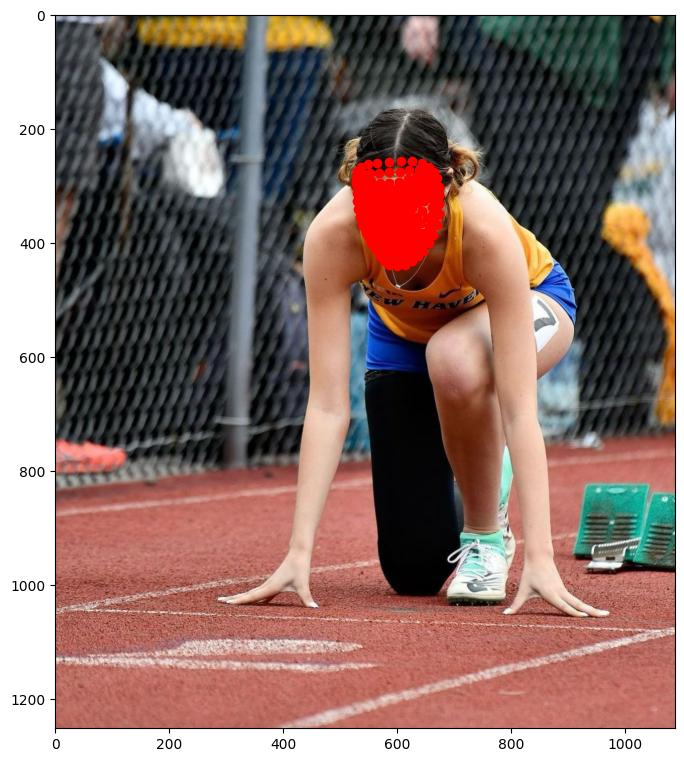

In [12]:
# Specify the path to your image
image_path = '/content/drive/MyDrive/CNN_Dataset/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG'  # Replace with your actual image path

# Read the image using OpenCV
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using PIL (compatible with Colab)
img_display = Image.fromarray(image_rgb)
plt.figure(figsize=(8,10))
plt.imshow(image_rgb)
for face_landmarks in results.multi_face_landmarks:
# Each face_landmarks is a list of 468 (x, y, z) coordinates representing the facial landmarks
  for landmark in face_landmarks.landmark:
    x, y, z = landmark.x, landmark.y, landmark.z
    plt.scatter(x*1080,y*1252,color='red')
            # Do something with the (x, y, z) coordinates
#plt.scatter(323,151,color='red')

In [13]:
len(face_landmarks.landmark)

468

In [14]:
!pip install gluoncv

In [15]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model  # load a custom model

# Predict with the model
results = model('/content/drive/MyDrive/CNN_Dataset/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG',save=True, conf=0.5)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG: 640x576 1 person, 129.2ms
Speed: 4.4ms preprocess, 129.2ms inference, 919.1ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/pose/predict2


In [16]:
s='/content/runs/pose/predict'


image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/03eca3f4-2cca-4f9a-9c28-58d7c4d76006.JPG: 640x640 1 person, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict2


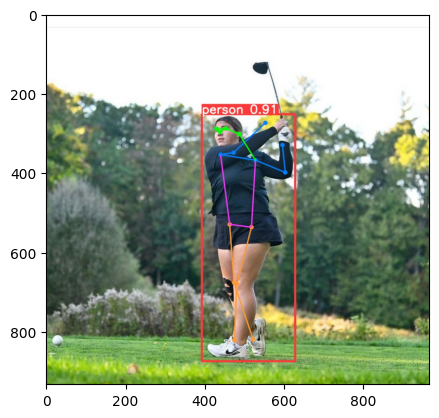

In [17]:
image_path = '/content/drive/MyDrive/CNN_Dataset/CNN_Dataset/03eca3f4-2cca-4f9a-9c28-58d7c4d76006.JPG'
results = model(image_path,save=True, conf=0.5)
img_name='/03eca3f4-2cca-4f9a-9c28-58d7c4d76006.JPG'
ctr=1
intermediate_path=s
resulting_im_path=intermediate_path+img_name
if(os.path.exists(resulting_im_path)):
  image = cv2.imread(resulting_im_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
else:
  while(True):
    intermediate_path=s+str(ctr)
    resulting_im_path=intermediate_path+img_name
    if(os.path.exists(resulting_im_path)):

      image = cv2.imread(resulting_im_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.imshow(image_rgb)
      break
    else:
      ctr=ctr+1

In [18]:
N=5

In [19]:
def comparison(image_path,img_name):
  results = model(image_path,save=True, conf=0.5)
  ctr=1
  intermediate_path=s
  resulting_im_path=intermediate_path+ '/' + img_name
  if(os.path.exists(resulting_im_path)):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    image1 = cv2.imread(resulting_im_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    plt.imshow(image1_rgb)
    plt.title('YOLO Processed Image')
    plt.show()
  else:
    while(True):
      intermediate_path=s+str(ctr)
      resulting_im_path=intermediate_path+'/'+img_name
      if(os.path.exists(resulting_im_path)):
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        image1 = cv2.imread(resulting_im_path)
        image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        plt.imshow(image1_rgb)
        plt.title('YOLO Processed Image')
        plt.show()
        break
    else:
      ctr=ctr+1

IMG_6721.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/IMG_6721.jpg: 640x480 2 persons, 66.7ms
Speed: 3.0ms preprocess, 66.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict2


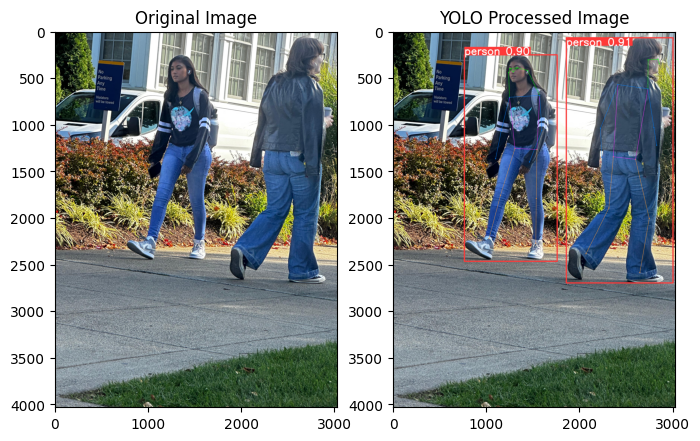

IMG_6747.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/IMG_6747.jpg: 640x480 4 persons, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict2


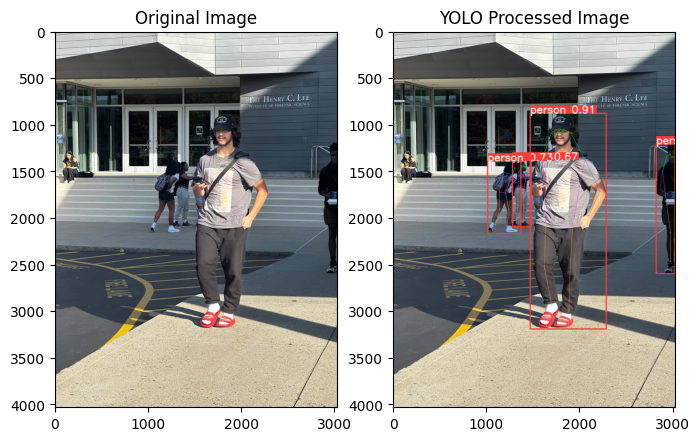

3d758278-a8d1-4c84-9ce1-11e4dd3414d3.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/3d758278-a8d1-4c84-9ce1-11e4dd3414d3.jpg: 384x640 1 person, 99.9ms
Speed: 2.7ms preprocess, 99.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/pose/predict2


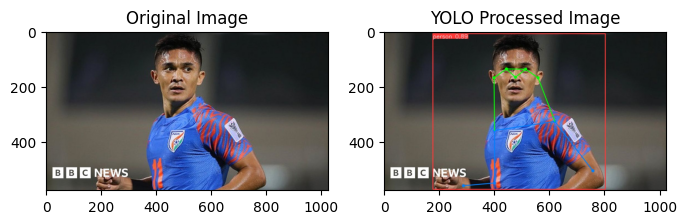

IMG_6700.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/IMG_6700.jpg: 640x480 2 persons, 8.5ms
Speed: 2.9ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict2


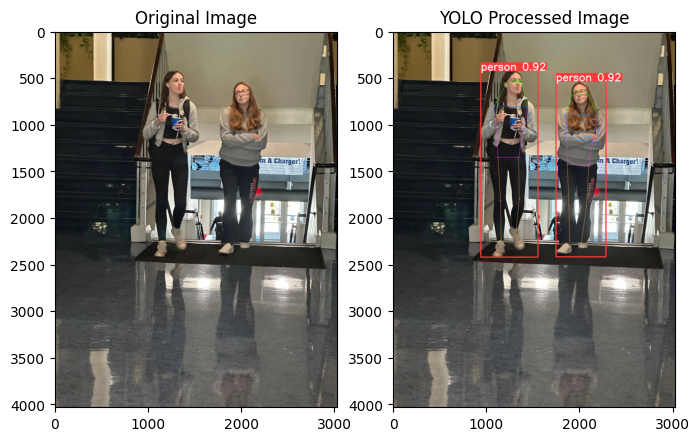

IMG_6759.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/CNN_Dataset/IMG_6759.jpg: 640x480 1 person, 13.0ms
Speed: 4.2ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict2


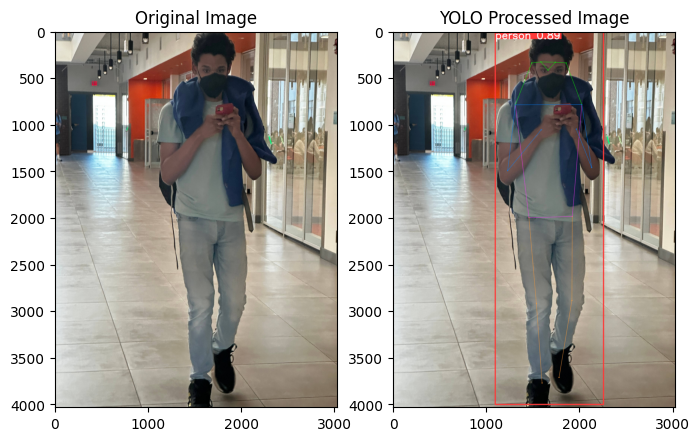

In [20]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/CNN_Dataset/CNN_Dataset'


for filename in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, filename)
    print(filename)
    comparison(img_path,filename)

In [21]:
def facemask(image_path):
  import mediapipe as mp
  mp_face_mesh = mp.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh()
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # Display the image using PIL (compatible with Colab)
  img_display = Image.fromarray(image_rgb)
  plt.figure(figsize=(8,10))
  plt.imshow(image_rgb)
  for face_landmarks in face_results(image_path).multi_face_landmarks:
  # Each face_landmarks is a list of 468 (x, y, z) coordinates representing the facial landmarks
    for landmark in face_landmarks.landmark:
      x, y, z = landmark.x, landmark.y, landmark.z
      plt.scatter(x*image_rgb.shape[1],y*image_rgb.shape[0],color='red')
  plt.show()

In [22]:
#image_path = '/content/drive/MyDrive/CNN_Dataset/CNN_Dataset/IMG_6700.jpg'


In [23]:
#facemask(image_path)

In [24]:
def face_results(image_path):
  import mediapipe as mp
  import cv2

  # Initialize MediaPipe FaceMesh
  mp_face_mesh = mp.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh()

  # Read an image
  image = cv2.imread(image_path)

  # Convert the image to RGB (MediaPipe uses RGB images)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Process the image and get facial landmarks
  results = face_mesh.process(image_path)
  return results